In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, os
sys.path.append('../../src/')
from copulae1 import *


In [15]:
# Replace with your directory to data:
data = pd.read_csv('../../data/btc future and reference rate/coingecko_future.csv')
brr = data.iloc[:,4]
btc = data.iloc[:,5]

u = ECDF(brr)(brr)
v = ECDF(btc)(btc)

In [22]:
q_arr = np.linspace(0.01,.99,50)
L_arr = []

for _ in range(2000):
    _id = np.random.choice(range(len(u)),len(u), True)
    _u = u[_id]
    _v = v[_id]
    L = np.array([empirical_lambda(_u,_v,q) for q in q_arr])
    L_arr.append(L)
    
L_arr = np.array(L_arr)

Optimization terminated successfully.
         Current function value: -680.976413
         Iterations: 39
         Function evaluations: 87
Optimization terminated successfully.
         Current function value: 0.049805
         Iterations: 38
         Function evaluations: 84


Text(0.5, 1.0, 'Quantile dependence of Gumbel copula fit and empirical data')

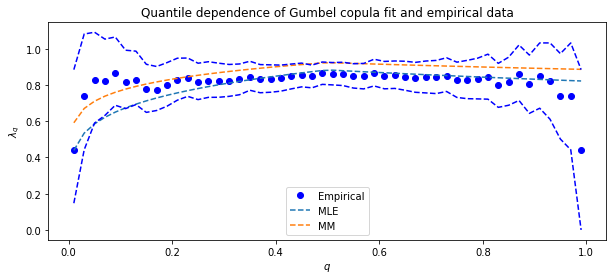

In [25]:
plt.figure(figsize=(10,4))
plt.plot(q_arr, L, 'bo', label='Empirical')

# fit Gumbel with MLE
C = Gumbel({'theta':10}, stats.uniform, stats.uniform)
C.canonical_calibrate(u,v)

# store quantile dependence
L_C = np.array([C._lambda(q) for q in q_arr])
L = np.array([empirical_lambda(u,v,q) for q in q_arr])

# plot
plt.plot(q_arr, L_C, '--', label="MLE")

# fit Gumbel with Method of Moments
C = Gumbel({'theta':10}, stats.uniform, stats.uniform)
C.mm_calibrate(u,v,[0.05,0.1,0.9,0.95])

L_C = np.array([C._lambda(q) for q in q_arr])
plt.plot(q_arr, L_C, '--', label="MM")
plt.plot(q_arr, np.quantile(np.array(L_arr), 0.05, axis=0), 'b--')
plt.plot(q_arr, np.quantile(np.array(L_arr), 0.95, axis=0), 'b--')
plt.legend()
plt.xlabel(r'$q$')
plt.ylabel(r'$\lambda_q$')
plt.title('Quantile dependence of Gumbel copula fit and empirical data')

# plt.savefig('../latex/_pics/Gumbel Copula quantile dependence.pdf', transparent=True)

Optimization terminated successfully.
         Current function value: -560.971962
         Iterations: 40
         Function evaluations: 85
Optimization terminated successfully.
         Current function value: 0.091523
         Iterations: 43
         Function evaluations: 97


Text(0.5, 1.0, 'Quantile dependence of Clayton copula fit and empirical data')

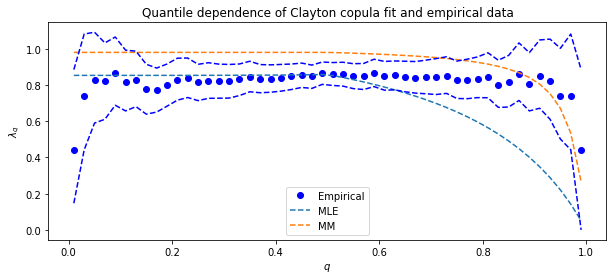

In [18]:
plt.figure(figsize=(10,4))
plt.plot(q_arr, L, 'bo', label='Empirical')

C = Clayton({'theta':10}, stats.uniform, stats.uniform)

C.canonical_calibrate(u,v)
L_C = np.array([C._lambda(q) for q in q_arr])
L = np.array([empirical_lambda(u,v,q) for q in q_arr])

plt.plot(q_arr, L_C, '--', label="MLE")

C = Clayton({'theta':10}, stats.uniform, stats.uniform)
C.mm_calibrate(u,v,[0.05,0.1,0.9,0.95])
L_C = np.array([C._lambda(q) for q in q_arr])
plt.plot(q_arr, L_C, '--', label="MM")
plt.plot(q_arr, np.quantile(np.array(L_arr), 0.05, axis=0), 'b--')
plt.plot(q_arr, np.quantile(np.array(L_arr), 0.95, axis=0), 'b--')
plt.legend()
plt.xlabel(r'$q$')
plt.ylabel(r'$\lambda_q$')
plt.title('Quantile dependence of Clayton copula fit and empirical data')

# plt.savefig('../latex/_pics/Clayton Copula quantile dependence.pdf', transparent=True)